In [ ]:
import numpy as np
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import sklearn.metrics as metrics

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/AMZN.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
df.isnull().sum()

Open    0
dtype: int64

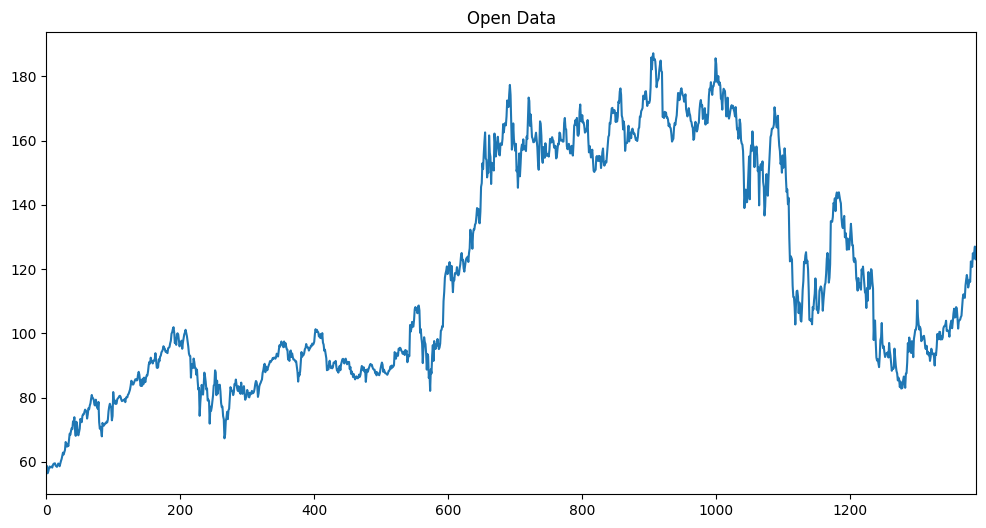

In [ ]:
df['Open'].plot(figsize=(12,6),title='Open Data').autoscale(axis='x',tight=True)

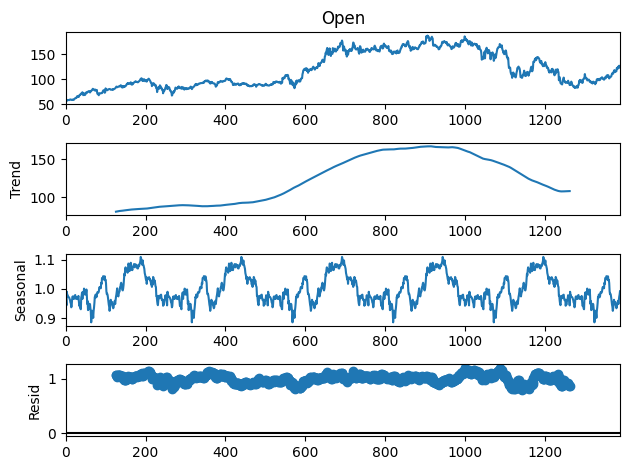

In [ ]:
decompose_result = seasonal_decompose(df['Open'],model='multiplicative', period=252)
decompose_result.plot();

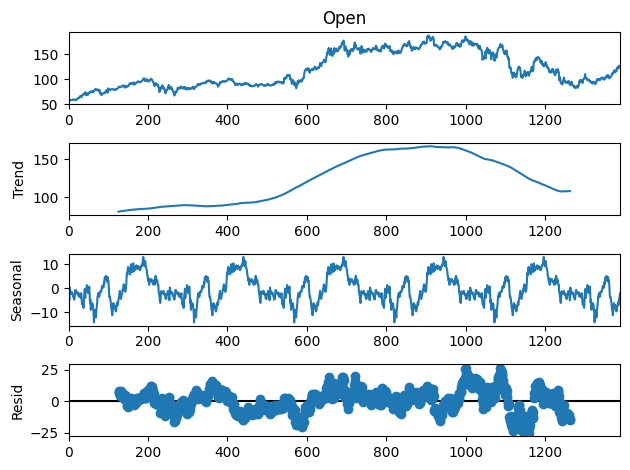

In [ ]:
decompose_result = seasonal_decompose(df['Open'],model='additive', period=252)
decompose_result.plot();

In [ ]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Train the Holt Winters model (Single exponential smoothing)
model = SimpleExpSmoothing(train_data).fit()

In [ ]:
# Train the Holt Winters model (Double exponential smoothing)
model = ExponentialSmoothing(train_data, trend='add').fit()

In [ ]:
# Train the Holt Winters model (Triple exponential smoothing)
model = ExponentialSmoothing(train_data, trend='add',
                             seasonal='add',
                              seasonal_periods=252).fit()

In [ ]:
Predictions=model.forecast(test_size)

In [ ]:
Pre_val=model.predict(len(df)-val_size, len(df)-1)

In [ ]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(len(df), len(df)+30-1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
1389    162.914084
1390    162.914084
1391    162.914084
1392    162.914084
1393    162.914084
1394    162.914084
1395    162.914084
1396    162.914084
1397    162.914084
1398    162.914084
1399    162.914084
1400    162.914084
1401    162.914084
1402    162.914084
1403    162.914084
1404    162.914084
1405    162.914084
1406    162.914084
1407    162.914084
1408    162.914084
1409    162.914084
1410    162.914084
1411    162.914084
1412    162.914084
1413    162.914084
1414    162.914084
1415    162.914084
1416    162.914084
1417    162.914084
1418    162.914084
dtype: float64


In [ ]:
y_val = np.array(val_data['Open'])
y_test = np.array(test_data['Open'])

In [ ]:
# 7. Đánh giá độ chính xác validate, test
print("Testing Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, Predictions), 4))
print("Testing Mean Squared Error:", round(metrics.mean_squared_error(y_test, Predictions), 4))
print("Testing Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, Predictions)), 4))

print("Validation Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, Pre_val), 4))
print("Validation Mean Squared Error:", round(metrics.mean_squared_error(y_val, Pre_val), 4))
print("Validation Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, Pre_val)), 4))

Testing Mean Absolute Error: 27.5626
Testing Mean Squared Error: 1176.8791
Testing Root Mean Squared Error: 34.3057
Validation Mean Absolute Error: 63.2119
Validation Mean Squared Error: 4096.1816
Validation Root Mean Squared Error: 64.0014


<Axes: >

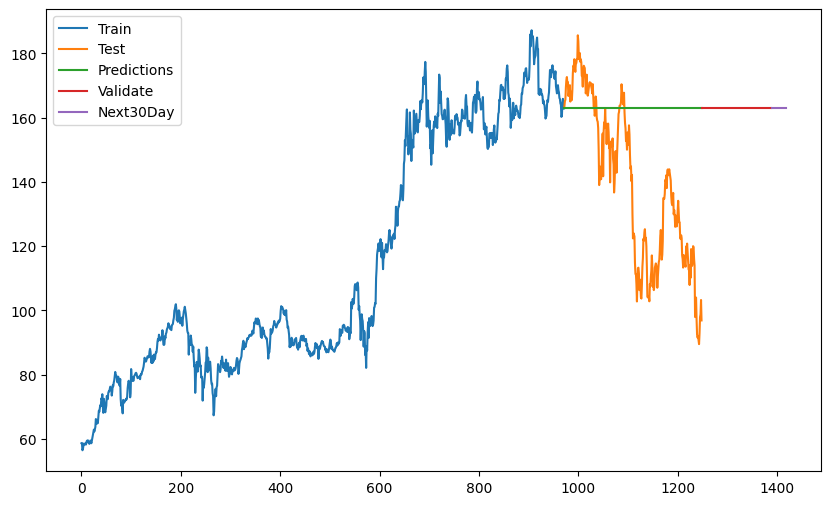

In [ ]:
train_data['Open'].plot(legend=True, label='Train',figsize=(10,6))
test_data['Open'].plot(legend=True, label='Test')
Predictions.plot(legend=True, label='Predictions')
Pre_val.plot(legend=True, label='Validate')
y_next_30_days.plot(legend=True, label='Next30Day')
#test_pred_add.plot(legend=True, label='predicted_test_add')

In [ ]:
print(model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Open   No. Observations:                  972
Model:             SimpleExpSmoothing   SSE                           5635.769
Optimized:                       True   AIC                           1712.322
Trend:                           None   BIC                           1722.081
Seasonal:                        None   AICC                          1712.364
Seasonal Periods:                None   Date:                 Mon, 19 Jun 2023
Box-Cox:                        False   Time:                         11:25:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9375041                alpha                 True
initial_level              58.599355                